## Fake News Classification 

In [2]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
from google.colab import files 
uploaded = files.upload()

Saving news_articles.csv to news_articles.csv


In [4]:
dfnews = pd.read_csv('news_articles.csv')

In [5]:
dfnews.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [6]:
dfnews.sample(10)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1970,Betty Johnson,2016-10-26T22:46:40.033+03:00,no title,un declares junk food a human rights issue say...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,man spoke softly carried big stick bill federe...,1.0
1470,Hrafnkell Haraldsson,2016-10-31T14:16:16.345+02:00,donald trump destroyed as fact checker reveals...,syria a man receives treatment at a hospital f...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,Real,donald trump whines isis cuts heads able water...,philippine president rodrigo duterte speaks ba...,1.0
1871,The Saker,2016-11-05T23:45:02.270+02:00,crosstalk on us election criminal in chief,right well that clears that up,english,thetruthseeker.co.uk,http://www.theunrealtimes.com/wp-content/uploa...,bs,Fake,hillary clinton attempted hack wikileaks delet...,liar,1.0
1832,Paul Craig Roberts,2016-11-02T16:35:02.784+02:00,can the american people defeat the oligarchy t...,réunion du conseil de sécurité du octobre \nd...,english,thedailysheeple.com,No Image URL,bs,Fake,citi clinton presidency marked nearcontinuous ...,posted october davidswanson picture video foot...,1.0
15,EdJenner,2016-11-12T06:16:03.318+02:00,trump supporter got nuts on msnbc reporter cov...,copyright percentfedupcom in association wit...,english,100percentfedup.com,http://conservativeangle.com/wp-content/upload...,bias,Real,trump supporter got nuts msnbc reporter coveri...,copyright percentfedupcom association liberty ...,1.0
690,Corbett,2016-11-01T19:29:20.309+02:00,anthrax the forgotten iraq war lie,podcast play in new window download embed \n...,english,corbettreport.com,No Image URL,bs,Fake,anthrax forgotten iraq war lie,podcast play new window download embed broc we...,0.0
1511,No Author,2016-11-12T07:00:00.000+02:00,presstvrussian warships flotilla off syrian coast,palestine palestinians inspect the damaged hou...,english,presstv.com,http://media.presstv.com/photo/20161112/6d264d...,state,Real,presstvamericans repudiated clinton foreign po...,irans carpet exports us mn thu oct economy ira...,1.0
1180,Kit Daniels,2016-10-28T00:15:48.481+03:00,public faith in elections falls as the state g...,grassroot voter fraud investigation hacked ele...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,Fake,cancer agency fire withholding carcinogenic gl...,trump promotes world peace hillary calls war v...,1.0
2022,David Rives,2016-10-27T00:40:21.214+03:00,yes creationists can be real scientists too,wars and rumors of wars nato calls for more tr...,english,wnd.com,http://www.wnd.com/files/2015/03/sheriff-joe-a...,bias,Real,jesus shirt sparks school uproar,print judith gait met father x lopsided grief ...,1.0
1430,Jason Easley,2016-10-28T20:53:25.708+03:00,marco rubio inches closer to unemployment as p...,the hillary clinton supporting priorities usa ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,Real,revived clinton email scandal killed slew new ...,sean colarossi mon oct st pm trump used tax av...,1.0


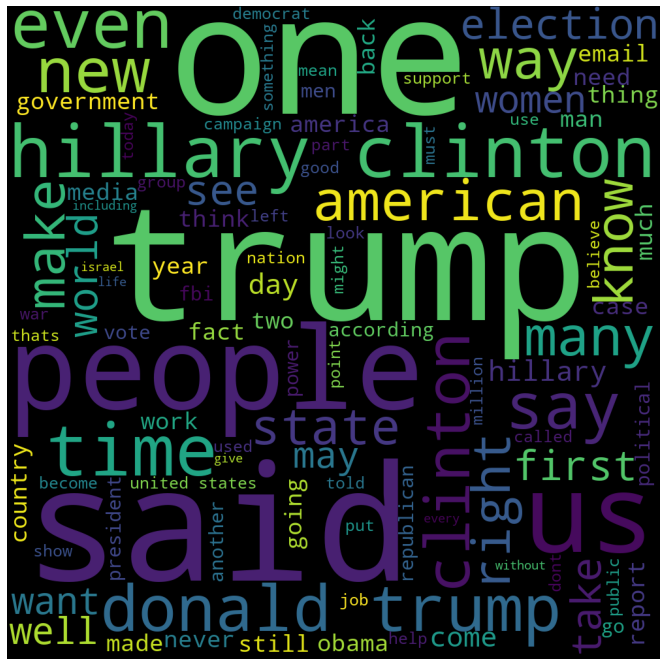

In [63]:
from wordcloud import WordCloud 
wc = WordCloud(background_color="Black", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(dfnews['text_without_stopwords']))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
dfnews.describe()

,hasImage
count,2095.000000
mean,0.777088
std,0.416299
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
#display info about dataset 

dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2096 non-null   object 
 1   published                2096 non-null   object 
 2   title                    2096 non-null   object 
 3   text                     2050 non-null   object 
 4   language                 2095 non-null   object 
 5   site_url                 2095 non-null   object 
 6   main_img_url             2095 non-null   object 
 7   type                     2095 non-null   object 
 8   label                    2095 non-null   object 
 9   title_without_stopwords  2094 non-null   object 
 10  text_without_stopwords   2046 non-null   object 
 11  hasImage                 2095 non-null   float64
dtypes: float64(1), object(11)
memory usage: 196.6+ KB


In [9]:
#size of dataset 
dfnews.shape


(2096, 12)

# Data Cleaning :

In [10]:
#check for all null values
dfnews.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [11]:
#drop all the null values
dfnews.dropna(inplace=True)

In [12]:
#Step  1- Dummiy the values in the label column , to represent Real and Fake by 1 and 0
#Step 2-Create new columns name 'real' 

dum_type=pd.get_dummies(dfnews.label,drop_first=True,prefix="")
dfnews=dfnews.join(dum_type)
dfnews.drop('label', axis=1, inplace=True)
dfnews.rename(columns={'_Real':'Real'}, inplace=True)

# EDA :

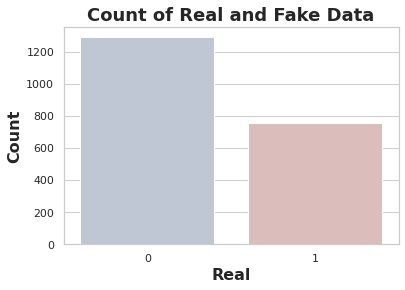

In [13]:
#How many Real and Fake news in the dataset? 

sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Real", data=dfnews, palette="vlag") #vlag
ax.set_title("Count of Real and Fake Data",fontdict = {'fontsize': 18},weight = 'bold');
plt.xlabel('Real',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Count',fontdict = {'fontsize': 16},weight = 'bold');




In [14]:
import plotly.express as px
fig = px.pie(dfnews,names='type',title='Types of Articles')
fig.show()

In [16]:

counews=dfnews['Real'].value_counts()
counews

0    1291
1     754
Name: Real, dtype: int64

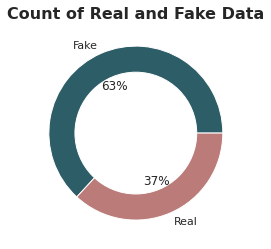

In [17]:
#Q1 :How many Real and Fake news in the dataset? 


names= ['Fake','Real']
my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(counews,labels=names,colors=['#2d5d67','#bb7b79'],autopct='%.0f%%')
p=plt.gcf()
sns.set(rc={'figure.figsize':(10,5)})   #64058f


p.gca().add_artist(my_circle)
plt.title('Count of Real and Fake Data', fontdict = {'fontsize': 16},weight = 'bold')
plt.show()

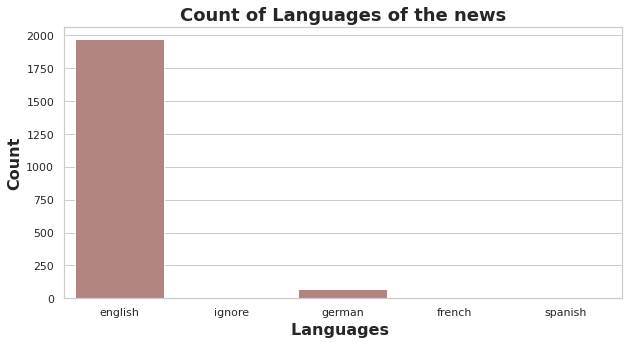

In [18]:
# What is the Languages in the dataset?
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="language", data=dfnews, palette=['#bb7b79','#2d5d67'])
ax.set_title("Count of Languages of the news",fontdict = {'fontsize': 18},weight = 'bold');
plt.xlabel('Languages ',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Count',fontdict = {'fontsize': 16},weight = 'bold');

sns.set(rc={'figure.figsize':(25,12)})



In [19]:
dfnews['type'].value_counts()

bs            598
conspiracy    430
bias          389
hate          244
satire        146
state         121
junksci       102
fake           15
Name: type, dtype: int64

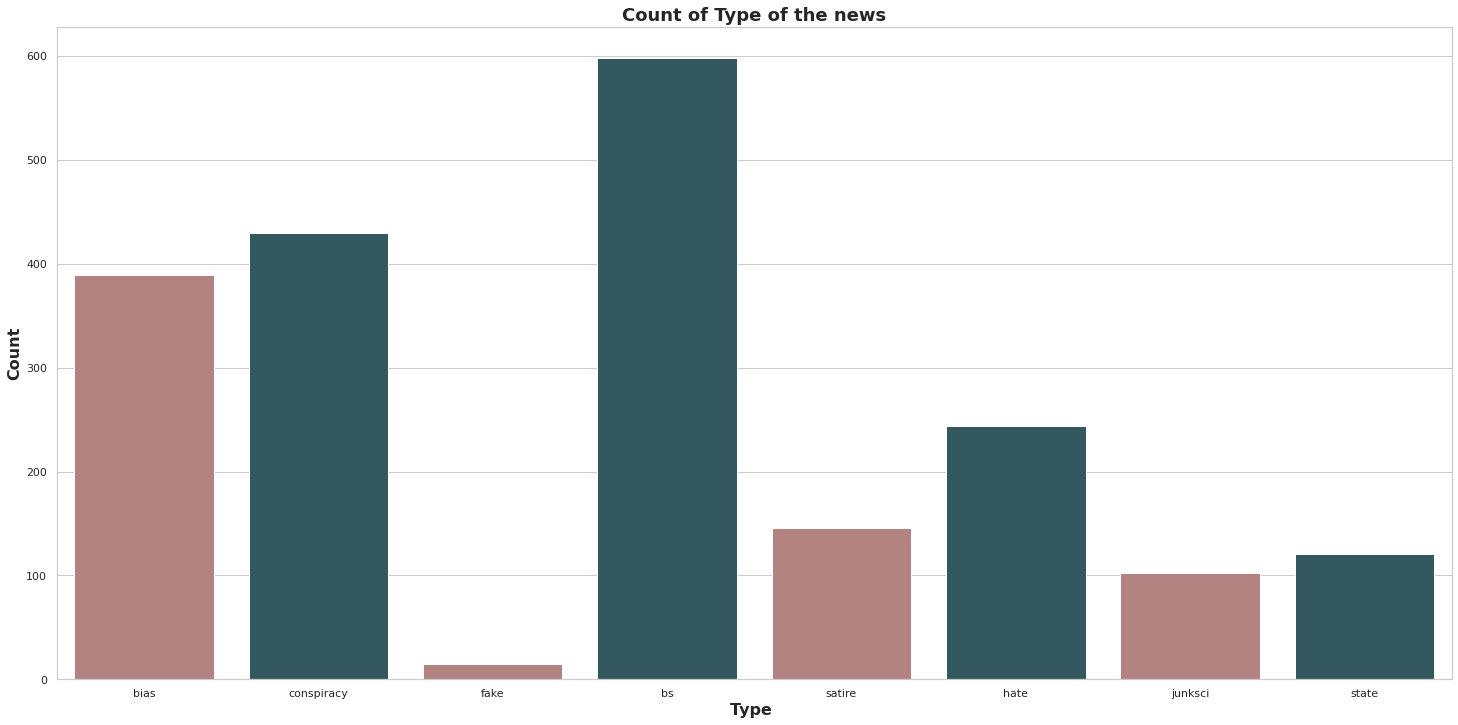

In [20]:
#plot to see Counts of type of news data
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="type", data=dfnews, palette=['#bb7b79','#2d5d67'])
ax.set_title("Count of Type of the news",fontdict = {'fontsize': 18},weight = 'bold');
plt.xlabel('Type ',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Count',fontdict = {'fontsize': 16},weight = 'bold');



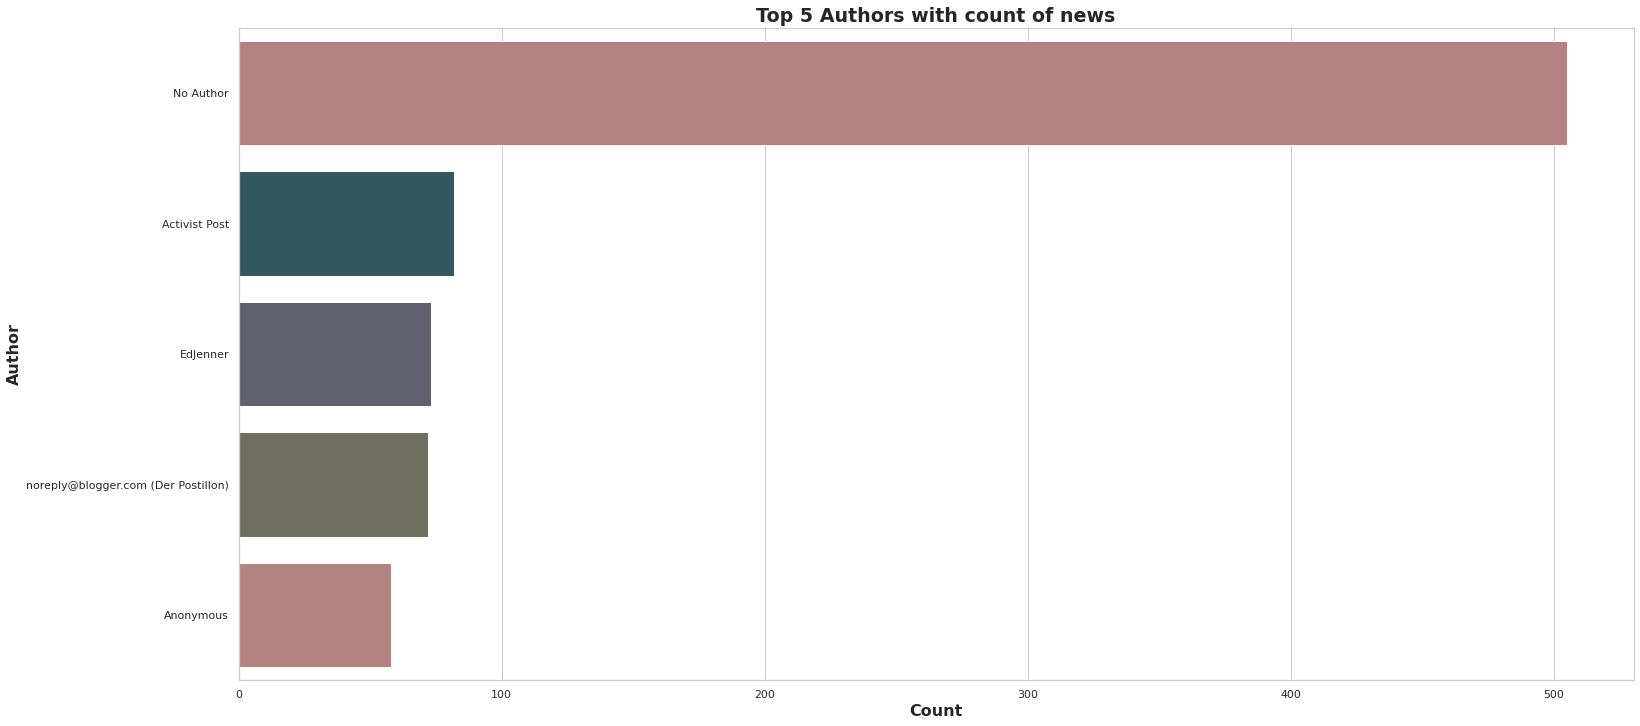

In [21]:
# Who is the top 5 author with the highest news?

sns.set_theme(style="whitegrid")
ax = sns.countplot(y="author", data=dfnews, palette=['#bb7b79','#2d5d67','#5d5d71','#71715d'
                                                 ], order =dfnews.author.value_counts().iloc[:5].index)

ax.set_title("Top 5 Authors with count of news",fontdict = {'fontsize': 19},weight = 'bold')

plt.xlabel('Count',fontdict = {'fontsize': 16},weight = 'bold');
plt.ylabel('Author',fontdict = {'fontsize': 16},weight = 'bold');


sns.set(rc={'figure.figsize':(25,12)})





#'#989882','#ab5c58','#799abb','#79403d','#d5adac','#bb7b79'

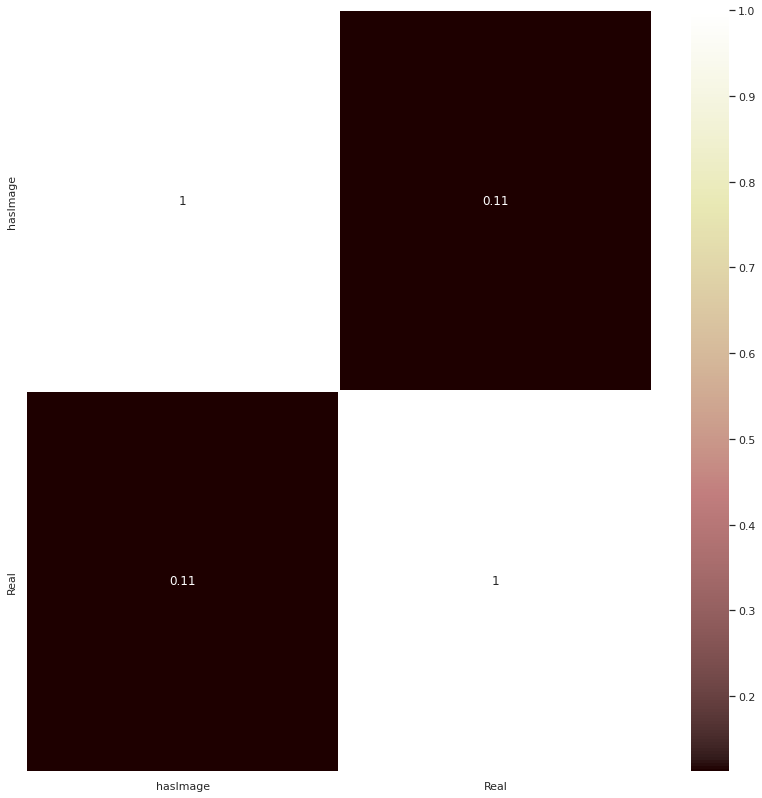

In [22]:
plt.figure(figsize = (14,14)) 
sns.heatmap(dfnews.corr(),linewidths=0.6, annot = True, cmap = "pink"); # as heatmap 



In [23]:
nimg=dfnews['hasImage'].value_counts()

nimg

1.0    1580
0.0     465
Name: hasImage, dtype: int64

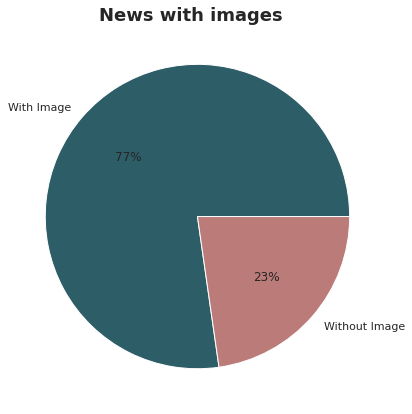

In [24]:
#How many news in the dataset that have images or not?

nimg=dfnews['hasImage'].value_counts()

labels=['With Image','Without Image']

sns.set(rc={'figure.figsize':(11,7)})


plt.pie(nimg, labels=labels ,colors=['#2d5d67','#bb7b79'],autopct='%.0f%%');
plt.title('News with images  ', fontdict = {'fontsize': 18},weight = 'bold');






In [25]:
dfnews.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage', 'Real'],
      dtype='object')

<Figure size 1008x1008 with 0 Axes>

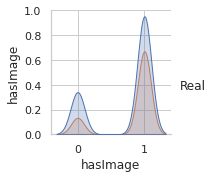

<Figure size 1008x1008 with 0 Axes>

In [26]:


sns.set_theme(style="whitegrid")


sns.pairplot(dfnews, hue='Real');

sns.set(rc={'figure.figsize':(15,12)})
plt.figure(figsize = (14,14)) 




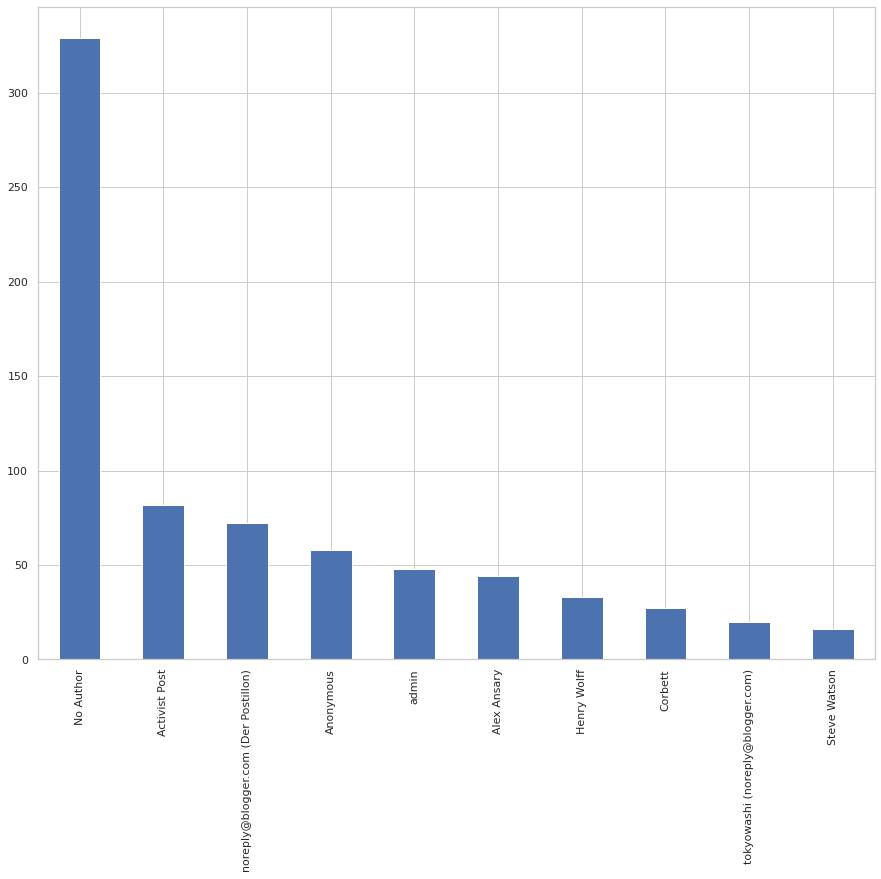

In [27]:
#Fake Authors
sns.set_theme(style="whitegrid")


Fn=dfnews.loc[dfnews.Real == 0].author.value_counts().head(10).plot(kind='bar');

Fn;

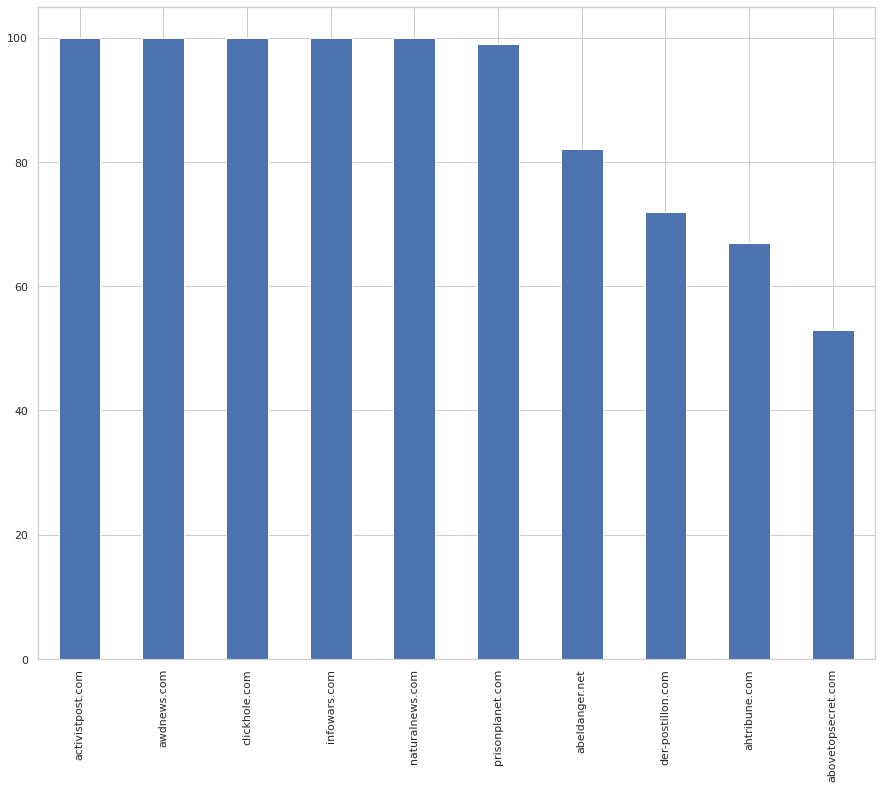

In [28]:
#Fake URL sites
dfnews.loc[dfnews.Real == 0].site_url.value_counts().head(10).plot(kind='bar');

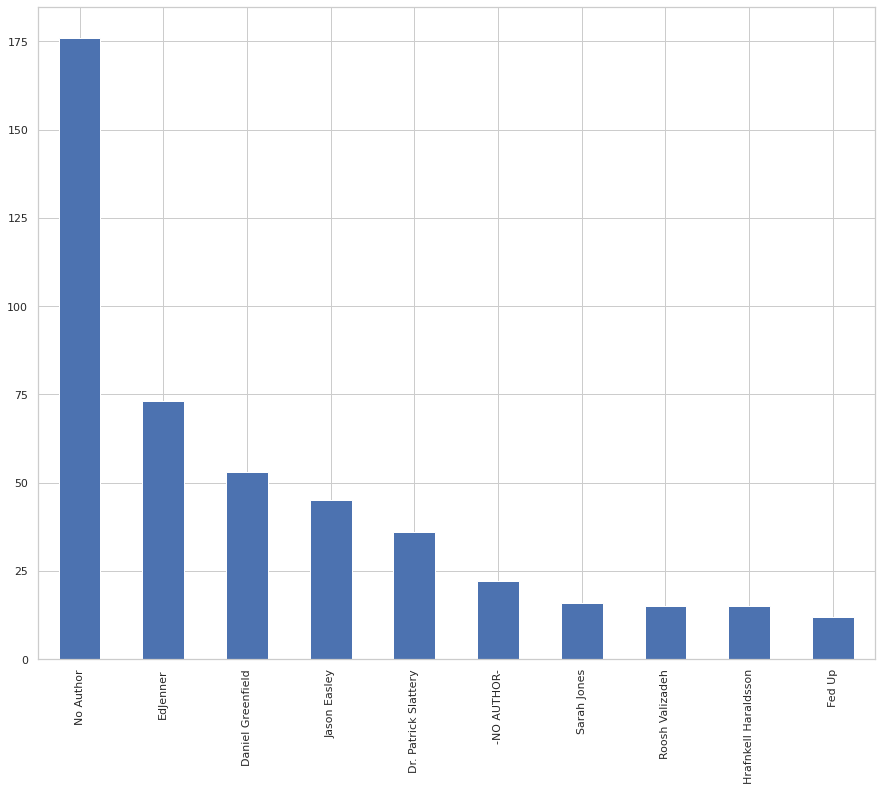

In [29]:
#Real Authors
dfnews.loc[dfnews.Real == 1].author.value_counts().head(10).plot(kind='bar');

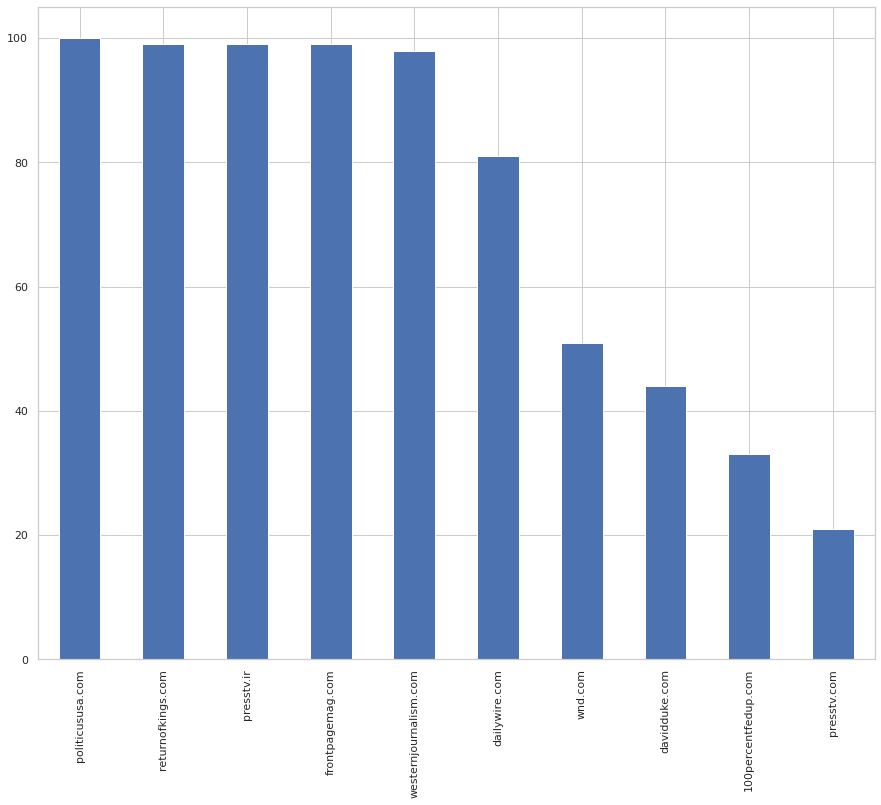

In [30]:
#Real URL sites
dfnews.loc[dfnews.Real == 1].site_url.value_counts().head(10).plot(kind='bar');

In [31]:
real = set(dfnews[dfnews['Real'] == 1]['site_url'].unique())
real

{'100percentfedup.com',
 'addictinginfo.org',
 'dailywire.com',
 'davidduke.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'newstarget.com',
 'politicususa.com',
 'presstv.com',
 'presstv.ir',
 'prisonplanet.com',
 'proudemocrat.com',
 'redstatewatcher.com',
 'returnofkings.com',
 'washingtonsblog.com',
 'westernjournalism.com',
 'whydontyoutrythis.com',
 'wnd.com'}

In [32]:
fake = set(dfnews[dfnews['Real'] == 0]['site_url'].unique())

fake

{'21stcenturywire.com',
 'abcnews.com.co',
 'abeldanger.net',
 'abovetopsecret.com',
 'activistpost.com',
 'adobochronicles.com',
 'ahtribune.com',
 'allnewspipeline.com',
 'americannews.com',
 'americasfreedomfighters.com',
 'amren.com',
 'amtvmedia.com',
 'awdnews.com',
 'barenakedislam.com',
 'clickhole.com',
 'coasttocoastam.com',
 'corbettreport.com',
 'countercurrents.org',
 'counterpunch.org',
 'darkmoon.me',
 'davidduke.com',
 'davidstockmanscontracorner.com',
 'davidwolfe.com',
 'dcclothesline.com',
 'defenddemocracy.press',
 'dennismichaellynch.com',
 'departed.co',
 'der-postillon.com',
 'fromthetrenchesworldreport.com',
 'frontpagemag.com',
 'galacticconnection.com',
 'globalresearch.ca',
 'infowars.com',
 'intrepidreport.com',
 'legorafi.fr',
 'madworldnews.com',
 'naturalnews.com',
 'newstarget.com',
 'presstv.ir',
 'prisonplanet.com',
 'projectveritas.com',
 'returnofkings.com',
 'shiftfrequency.com',
 'thedailysheeple.com',
 'theeconomiccollapseblog.com',
 'thefreethoug

Here we can see that the Authors and Sites for real and fake news are clearly different. Meaning the same source is not producing real and fake news. There are some sites that produce both news but mostly they produce 1 type and some news articles can be of the other type. So with the main text, site urls and author names might also help in the prediction.

### Feature Engineering

In [33]:
#target is our column to be predicted and features are the columns that we will use for modelling
labels = dfnews.Real
features = dfnews[['author','site_url','text_without_stopwords']]

In [34]:
features

,author,site_url,text_without_stopwords
0,Barracuda Brigade,100percentfedup.com,print pay back money plus interest entire fami...
1,reasoning with facts,100percentfedup.com,attorney general loretta lynch plead fifth bar...
2,Barracuda Brigade,100percentfedup.com,red state fox news sunday reported morning ant...
3,Fed Up,100percentfedup.com,email kayla mueller prisoner tortured isis cha...
4,Fed Up,100percentfedup.com,email healthcare reform make america great sin...
...,...,...,...
2041,Matt Barber,wnd.com,check hillarythemed haunted house anticlinton ...
2042,Jane Chastain,wnd.com,good samaritan wearing indian headdress disarm...
2043,Michael Brown,wnd.com,skype sex scam fortune built shame moroccan bo...
2044,Ann Coulter,wnd.com,posted eddie skyhigh potency may scare away cr...


In [35]:
#since all the feature columns are text data, we want to use text mining techniques, we put all of them in the same column for ease of processing
features['combined_url_text'] = features["author"]+" "+features["site_url"] + " " + features["text_without_stopwords"]
features.drop(['author','site_url', 'text_without_stopwords'], axis = 1, inplace = True)
features=features.combined_url_text

In [36]:
features

0       Barracuda Brigade 100percentfedup.com print pa...
1       reasoning with facts 100percentfedup.com attor...
2       Barracuda Brigade 100percentfedup.com red stat...
3       Fed Up 100percentfedup.com email kayla mueller...
4       Fed Up 100percentfedup.com email healthcare re...
                              ...                        
2041    Matt Barber wnd.com check hillarythemed haunte...
2042    Jane Chastain wnd.com good samaritan wearing i...
2043    Michael Brown wnd.com skype sex scam fortune b...
2044    Ann Coulter wnd.com posted eddie skyhigh poten...
2045    Larry Elder wnd.com billion even known keeping...
Name: combined_url_text, Length: 2045, dtype: object

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_words = TfidfVectorizer(stop_words='english')
X = vectorizer_words.fit_transform(features)

In [38]:
#trying to cluster the 2 data centres ie fake and real news
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 100, n_init = 1, verbose = True)
km.fit(X)

Initialization complete
Iteration 0, inertia 4004.4748375923778
Iteration 1, inertia 1993.1041747163954
Iteration 2, inertia 1988.4094904268895
Iteration 3, inertia 1988.0737076029986
Iteration 4, inertia 1987.7757166228696
Iteration 5, inertia 1986.4508660104584
Iteration 6, inertia 1986.118662967926
Converged at iteration 6: strict convergence.


KMeans(max_iter=100, n_clusters=2, n_init=1, verbose=True)

In [39]:
import numpy as np
np.unique(km.labels_, return_counts=True)
features.reset_index(drop=True, inplace=True)

In [40]:
#Here we are collecting all the fake data into one cluster and all the real data into another.
#We are doing this as a pre step to the coming logic.
text={}
for i,cluster in enumerate(km.labels_):
    oneDocument = features[i]
    if cluster not in text.keys():
        text[cluster] = oneDocument
    else:
        text[cluster] += oneDocument

In [41]:
#importing NLTK libraries for NLP techiniques
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from string import punctuation
from heapq import nlargest
import nltk 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
#here we are finding the keywords that appear in both the clusters and we do not want to include the stop words as those will be the most frequent
_stopwords = set(stopwords.words('english') + list(punctuation))

keywords = {}
counts={}
for cluster in range(2):
    word_sent = word_tokenize(text[cluster].lower())
    word_sent=[word for word in word_sent if word not in _stopwords]
    freq = FreqDist(word_sent)
    keywords[cluster] = nlargest(100, freq, key=freq.get)
    counts[cluster]=freq

In [43]:
keywords

{0: ['der',
  'die',
  'und',
  'zu',
  'das',
  'mit',
  'auf',
  'von',
  'den',
  'sich',
  'ist',
  'ein',
  'nicht',
  'ich',
  'postillon',
  'sie',
  'er',
  'für',
  'dem',
  'als',
  'hat',
  'noch',
  'dass',
  'eine',
  'im',
  'es',
  'werden',
  'aus',
  'auch',
  'des',
  'wie',
  'der-postillon.com',
  'blogger.com',
  'nach',
  'einer',
  'nur',
  'trump',
  'wird',
  'oder',
  'artikel',
  'haben',
  'bei',
  'einem',
  'einen',
  'vor',
  'november',
  'teilennoreply',
  'man',
  'kann',
  'habe',
  'um',
  'sind',
  'mehr',
  'foto',
  'donald',
  'ssi',
  'schon',
  'über',
  'sein',
  'wir',
  'war',
  'doch',
  'dann',
  'dan',
  'jetzt',
  'dpo',
  'aber',
  'seine',
  'weil',
  'wieder',
  'heute',
  'durch',
  'da',
  'nun',
  'muss',
  'shutterstock',
  'immer',
  'wenn',
  'mich',
  'soll',
  'sei',
  'damit',
  'zum',
  'oettinger',
  'dieser',
  'alle',
  'seit',
  'mann',
  'bis',
  'erstmals',
  'gerade',
  'ob',
  'beim',
  'unter',
  'ganz',
  'dabei',


In [44]:
#here we are finding keyword that are uniques to each cluster
set0 = set(keywords[0])
set1 = set(keywords[1])
unique0=set0-set1
unique1 =set1-set0

In [45]:
unique_keys={}
unique_keys[0]=nlargest(10, unique0, key=counts[0].get)
unique_keys[1]=nlargest(10, unique1, key=counts[1].get)

In [46]:
unique_keys

{0: ['der', 'die', 'und', 'zu', 'das', 'mit', 'auf', 'von', 'den', 'sich'],
 1: ['clinton',
  'one',
  'us',
  'said',
  'people',
  'would',
  'hillary',
  'also',
  'like',
  'election']}

### Classification Models

In [47]:
#using the Vectorizer before doing the classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.20,random_state=42)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=vectorizer.get_feature_names())

In [48]:
print(tfidf_train.shape)
print(y_train.shape)

(1636, 42141)
(1636,)


In [49]:
#Kneighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

KNb = KNeighborsClassifier(n_neighbors=5)
KNb.fit(tfidf_train, y_train)
y_pred = KNb.predict(tfidf_test)
KNscore=metrics.accuracy_score(y_test,y_pred)
print("KNN Model accuracy: %0.4f" %KNscore)

KNN Model accuracy: 0.7188


In [50]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[215  49]
 [ 66  79]]


In [51]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=1000)
RF.fit(tfidf_train,y_train)
y_pred = RF.predict(tfidf_test)
RFscore = metrics.accuracy_score(y_test,y_pred)
print("RandomForest Model accuracy:  %0.4f" %RFscore)

RandomForest Model accuracy:  0.9438


In [52]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[262   2]
 [ 21 124]]


In [61]:
#Adaboost Classification
from   sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5)
history = Adab.fit(tfidf_train, y_train)
y_pred = Adab.predict(tfidf_test)
ABscore = metrics.accuracy_score(y_test,y_pred)
print("Adaboost Classifier accuracy: %0.4f" %ABscore)

Adaboost Classifier accuracy: 0.9878


Among all the classifications, Adaboost is performing the best. We will choose AdaBoost Model

### Result

In [62]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[261   3]
 [  2 143]]


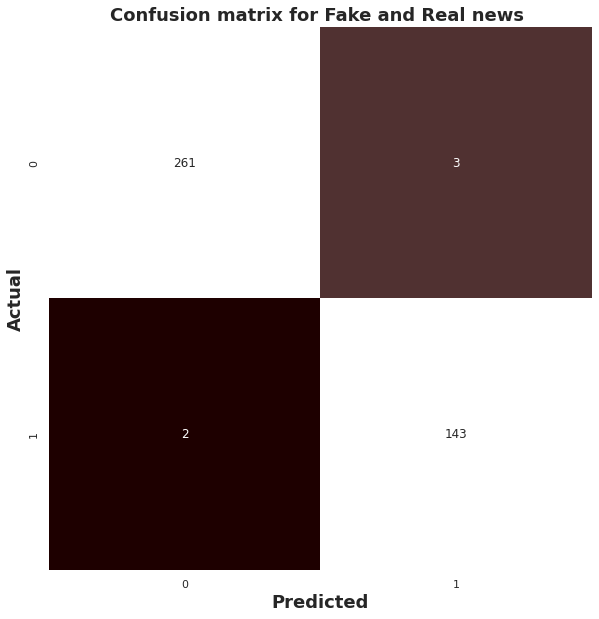

In [60]:
#creating a matrix using seaborn
import seaborn as sns

cm_df = pd.DataFrame(conf_matrix, columns=np.unique(y_test), index = np.unique(y_test))
cm_df.columns.name = 'Predicted'
cm_df.index.name = 'Actual'
cm_df
plt.figure(figsize=(10,10))

plt.xlabel('Predicted',fontdict = {'fontsize': 18},weight = 'bold')
plt.ylabel('Actual',fontdict = {'fontsize': 18},weight = 'bold')

plt.title('Confusion matrix for Fake and Real news ',fontdict = {'fontsize': 18},weight = 'bold')




sns.heatmap(cm_df, annot=True, vmax=20, square=True, cmap="pink",annot_kws={"size":12} ,cbar=False, fmt='g');








As we can see in the Confusion matrix, we have 261 records correctly predicted Fake and 144 records correctly predicted as Real. 3 Fake news were predicted as Real and 1 Real news were predicted as Fake.